# **CSCE 5218 / CSCE 4930 Deep Learning**

Name: Anjan Shrestha

UNT ID: 11157772

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2022-02-05 13:20:01--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu... 129.120.123.155
Connecting to huang.eng.unt.edu|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: 'test.dat'

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0.001s  

2022-02-05 13:20:01 (2.53 MB/s) - 'test.dat' saved [2844/2844]

--2022-02-05 13:20:01--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu... 129.120.123.155
Connecting to huang.eng.unt.edu|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: 'train.dat'

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0.001s  

2022-02-05 13:20:01 (13.7 MB/s) - 'train.dat' saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [[-1] + instance]
        data += instance
    return data


def dot_product(array1, array2):
    # Return dot product of array 1 and array 2
    result = 0;
    for x in range(len(array1)):
        result += array1[x] * array2[x]
    return result


def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    # Return the output of the model 
    in_value = dot_product(weight, instance)
    result = sigmoid(in_value)
    return result

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # Return the prediction of the model
    result = output(weights, instance)
    
    if result >= 0.5:
        return 1
    else:
        return 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Step: Random Weight initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Step: Summing up product of weights and values 
            in_value = dot_product(weights, instance)
            # Step: Applying Sigmoid Activation Function
            output = sigmoid(in_value)
            # Step: Calculating error
            error = instance[-1] - output
            #Step: Updating Weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

####  Add your answer here (text only)
This is because on predict method, we are returning 1 if the output is greater than or equals to 0.5 and returning 0 if the output is less than 0.5. Basically, we are normalizing output value to either 1 or 0 during prediction. But while training the perceptron, we need actual output instead of normalized output to better calculate the error and update the weights through back propagation. 



### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### Add your answer here (code and output in the format above) 


In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

total_tr_size = []
total_epochs = []
total_lr = []
accuracies = []

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
        
      # Attributes for later analysis
      total_tr_size.append(tr_size)
      accuracies.append(accuracy)
      total_lr.append(lr)
      total_epochs.append(epochs)
        
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### Add your answer here (code and text)
A. No we don't need to train with all the training dataset to get the highest accuracy with the test dataset. As represented by Scatter plot below (Training Size vs Accuracy), We got the highest accuracy i.e. 80 when training size is only 75 percent.

B. The training in second run obtains worse accuracy than the first one despite the second one uses more traning data. That is because the first one has higher learning rate than the second one. So, the higher rate results the model to have inaccurate accuracy. The second one has lower learning rate with higher training data but has lower accuracy as it learns and updates the weights slowly but very precisely than the second one.

C. Yes, if we add additional hyperparameters, we could be able to get higher accuracy than 80. Currently, we are only using three hyperparameters but we can also add additional hyperparameter such as batch size and tune it to get higher accuracy.

D. No, it is not always worth traning for more epochs while keeping all other hyperparameters fixed. It is because sometimes running for more epochs can cause model to overfit and give lower accuracy. For example, in the following output from above, training size and learning rate are fixed but epochs are changing. And we can see that epochs with 100 has lower accuracy i.e. 64 than the other epochs i.e. 68.

#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

#tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

#tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0

#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0



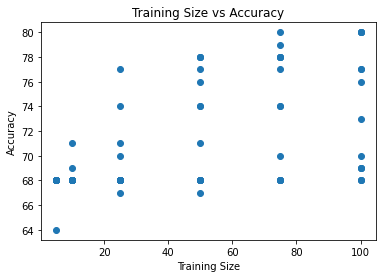

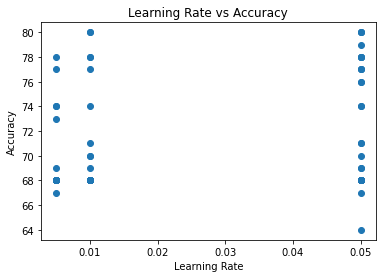

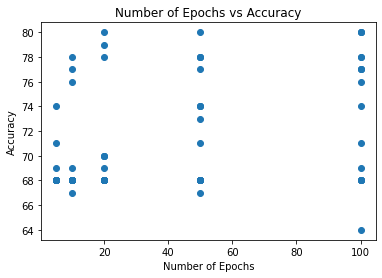

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(total_tr_size, accuracies)
plt.title('Training Size vs Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.show()

plt.scatter(total_lr, accuracies)
plt.title('Learning Rate vs Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

plt.scatter(total_epochs, accuracies)
plt.title('Number of Epochs vs Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.show()